In [168]:
# Scratch Pad to load stock data from csv to a dataframe

In [169]:
import pandas as pd
import datetime as dt
import os
import pickle
import numpy as np

In [170]:
with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)

main_df = pd.DataFrame()

In [171]:
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'C

In [172]:
ticker = 'ATVI'

In [173]:
count = 0

In [175]:
df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))

In [176]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1993-10-25,1.250000,0.937500,1.250000,0.937500,18000.0,0.831163
1,1993-10-26,1.229167,0.854167,1.229167,0.864583,189600.0,0.766516
2,1993-10-27,0.864583,0.864583,0.864583,0.864583,0.0,0.766516
3,1993-10-28,0.833333,0.583333,0.708333,0.822917,30000.0,0.729576
4,1993-10-29,0.875000,0.833333,0.875000,0.833333,172800.0,0.738811


In [177]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

In [178]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1993-10-25,1.250000,0.937500,1.250000,0.937500,18000.0,0.831163
1993-10-26,1.229167,0.854167,1.229167,0.864583,189600.0,0.766516
1993-10-27,0.864583,0.864583,0.864583,0.864583,0.0,0.766516
1993-10-28,0.833333,0.583333,0.708333,0.822917,30000.0,0.729576
1993-10-29,0.875000,0.833333,0.875000,0.833333,172800.0,0.738811


In [179]:
# Calculate adjusted open and returns
df['Factor'] = df['Close'] / df['Adj Close']
df['Adj Open'] = df ['Open'] / df['Factor']
df

,High,Low,Open,Close,Volume,Adj Close,Factor,Adj Open
Date,,,,,,,,
1993-10-25,1.250000,0.937500,1.250000,0.937500,18000.0,0.831163,1.127938,1.108217
1993-10-26,1.229167,0.854167,1.229167,0.864583,189600.0,0.766516,1.127938,1.089747
1993-10-27,0.864583,0.864583,0.864583,0.864583,0.0,0.766516,1.127938,0.766516
1993-10-28,0.833333,0.583333,0.708333,0.822917,30000.0,0.729576,1.127938,0.627989
1993-10-29,0.875000,0.833333,0.875000,0.833333,172800.0,0.738811,1.127938,0.775752
...,...,...,...,...,...,...,...,...
2022-05-09,77.639999,76.339996,77.419998,77.169998,8484400.0,77.169998,1.000000,77.419998
2022-05-10,77.879997,76.150002,77.709999,76.919998,6761300.0,76.919998,1.000000,77.709999
2022-05-11,78.139999,76.449997,76.680000,77.470001,6490000.0,77.470001,1.000000,76.680000


In [180]:
df

,High,Low,Open,Close,Volume,Adj Close,Factor,Adj Open
Date,,,,,,,,
1993-10-25,1.250000,0.937500,1.250000,0.937500,18000.0,0.831163,1.127938,1.108217
1993-10-26,1.229167,0.854167,1.229167,0.864583,189600.0,0.766516,1.127938,1.089747
1993-10-27,0.864583,0.864583,0.864583,0.864583,0.0,0.766516,1.127938,0.766516
1993-10-28,0.833333,0.583333,0.708333,0.822917,30000.0,0.729576,1.127938,0.627989
1993-10-29,0.875000,0.833333,0.875000,0.833333,172800.0,0.738811,1.127938,0.775752
...,...,...,...,...,...,...,...,...
2022-05-09,77.639999,76.339996,77.419998,77.169998,8484400.0,77.169998,1.000000,77.419998
2022-05-10,77.879997,76.150002,77.709999,76.919998,6761300.0,76.919998,1.000000,77.709999
2022-05-11,78.139999,76.449997,76.680000,77.470001,6490000.0,77.470001,1.000000,76.680000


In [184]:
print(f'Length before dropping NA rows: {len(df)}')
df = df.dropna(subset=['Adj Close', 'Adj Open'])
print(f'Length after  dropping NA rows: {len(df)}')

Length before dropping NA rows: 7191
Length after  dropping NA rows: 7191


In [182]:
# Calculate log returns
df['r_full'] = np.log(df['Adj Close']).diff()
df['r_intr'] = np.log(df['Adj Close']) - np.log(df['Adj Open'])
df['r_ovnt'] = df['r_full'] - df['r_intr']
df

,High,Low,Open,Close,Volume,Adj Close,Factor,Adj Open,r_full,r_intr,r_ovnt
Date,,,,,,,,,,,
1993-10-25,1.250000,0.937500,1.250000,0.937500,18000.0,0.831163,1.127938,1.108217,NaN,-2.876821e-01,NaN
1993-10-26,1.229167,0.854167,1.229167,0.864583,189600.0,0.766516,1.127938,1.089747,-0.080969,-3.518446e-01,2.708752e-01
1993-10-27,0.864583,0.864583,0.864583,0.864583,0.0,0.766516,1.127938,0.766516,0.000000,1.665335e-16,-1.665335e-16
1993-10-28,0.833333,0.583333,0.708333,0.822917,30000.0,0.729576,1.127938,0.627989,-0.049392,1.499410e-01,-1.993330e-01
1993-10-29,0.875000,0.833333,0.875000,0.833333,172800.0,0.738811,1.127938,0.775752,0.012578,-4.879055e-02,6.136852e-02
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,77.639999,76.339996,77.419998,77.169998,8484400.0,77.169998,1.000000,77.419998,-0.008645,-3.234365e-03,-5.410269e-03
2022-05-10,77.879997,76.150002,77.709999,76.919998,6761300.0,76.919998,1.000000,77.709999,-0.003245,-1.021804e-02,6.973181e-03
2022-05-11,78.139999,76.449997,76.680000,77.470001,6490000.0,77.470001,1.000000,76.680000,0.007125,1.024986e-02,-3.124975e-03


In [148]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,Factor,Adj Open,r_full,r_intr,r_ovnt
count,7191.000000,7191.000000,7191.000000,7191.000000,7.191000e+03,7191.000000,7191.000000,7191.000000,7190.000000,7191.000000,7190.000000
mean,20.072105,19.542007,19.821956,19.813524,7.914911e+06,19.050696,1.094003,19.058912,0.000631,-0.000778,0.001370
std,25.606707,25.004537,25.330436,25.309749,7.970290e+06,25.034988,0.044831,25.055831,0.033095,0.030239,0.022383
min,0.333333,0.239583,0.270833,0.291667,0.000000e+00,0.258584,1.000000,0.240113,-0.356674,-0.356675,-0.236102
25%,1.494792,1.427083,1.466146,1.463542,3.759950e+06,1.297537,1.051028,1.299846,-0.012440,-0.012293,-0.004042
50%,10.500000,10.110000,10.330000,10.300000,6.536300e+06,9.176035,1.127938,9.162735,0.000000,0.000000,0.000300
75%,23.469999,23.080000,23.295000,23.320000,1.006025e+07,22.108533,1.127938,22.106902,0.013792,0.011369,0.006127
max,104.529999,102.550003,103.820000,103.809998,2.251328e+08,102.699326,1.127939,102.709221,0.405464,0.479574,0.282892


<AxesSubplot:xlabel='Date'>

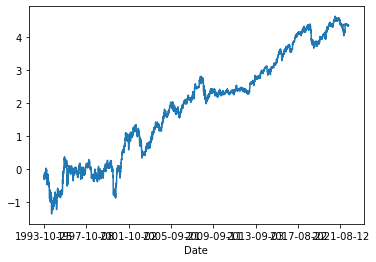

In [149]:
np.log(df['Adj Close']).plot()

In [150]:
# Convert the tabel in long form so that we can load it into a database
df1 = df.unstack().reset_index()

In [185]:
df1.columns

Index(['Ticker', 'Date', 'Field', 'Value'], dtype='object')

In [152]:
df1.columns = ['Field', 'Date', 'Value']

In [153]:
df1['Ticker'] = ticker
df1

,Field,Date,Value,Ticker
0,High,1993-10-25,1.250000,ATVI
1,High,1993-10-26,1.229167,ATVI
2,High,1993-10-27,0.864583,ATVI
3,High,1993-10-28,0.833333,ATVI
4,High,1993-10-29,0.875000,ATVI
...,...,...,...,...
79096,r_ovnt,2022-05-09,-0.005410,ATVI
79097,r_ovnt,2022-05-10,0.006973,ATVI
79098,r_ovnt,2022-05-11,-0.003125,ATVI
79099,r_ovnt,2022-05-12,-0.007645,ATVI


In [154]:
df1 = df1[['Ticker', 'Date', 'Field','Value']]

In [155]:
df1.head()

,Ticker,Date,Field,Value
0,ATVI,1993-10-25,High,1.250000
1,ATVI,1993-10-26,High,1.229167
2,ATVI,1993-10-27,High,0.864583
3,ATVI,1993-10-28,High,0.833333
4,ATVI,1993-10-29,High,0.875000


In [165]:
# Test - pivot table again:
df2 = df1.pivot_table(values='Value', index=['Date'], columns=['Ticker', 'Field'])
df2

Ticker           ATVI                                                        \
Field       Adj Close   Adj Open      Close    Factor       High        Low   
Date                                                                          
1993-10-25   0.831163   1.108217   0.937500  1.127938   1.250000   0.937500   
1993-10-26   0.766516   1.089747   0.864583  1.127938   1.229167   0.854167   
1993-10-27   0.766516   0.766516   0.864583  1.127938   0.864583   0.864583   
1993-10-28   0.729576   0.627989   0.822917  1.127938   0.833333   0.583333   
1993-10-29   0.738811   0.775752   0.833333  1.127938   0.875000   0.833333   
...               ...        ...        ...       ...        ...        ...   
2022-05-09  77.169998  77.419998  77.169998  1.000000  77.639999  76.339996   
2022-05-10  76.919998  77.709999  76.919998  1.000000  77.879997  76.150002   
2022-05-11  77.470001  76.680000  77.470001  1.000000  78.139999  76.449997   
2022-05-12  77.379997  76.879997  77.379997  1.000000  77.870003  76.500000   
2022-05-13  77.739998  77.430000  77.739998  1.000000  78.320000  77.339996   

Ticker                                                                  
Field            Open     Volume    r_full        r_intr        r_ovnt  
Date                                                                    
1993-10-25   1.250000    18000.0       NaN -2.876821e-01           NaN  
1993-10-26   1.229167   189600.0 -0.080969 -3.518446e-01  2.708752e-01  
1993-10-27   0.864583        0.0  0.000000  1.665335e-16 -1.665335e-16  
1993-10-28   0.708333    30000.0 -0.049392  1.499410e-01 -1.993330e-01  
1993-10-29   0.875000   172800.0  0.012578 -4.879055e-02  6.136852e-02  
...               ...        ...       ...           ...           ...  
2022-05-09  77.419998  8484400.0 -0.008645 -3.234365e-03 -5.410269e-03  
2022-05-10  77.709999  6761300.0 -0.003245 -1.021804e-02  6.973181e-03  
2022-05-11  76.680000  6490000.0  0.007125  1.024986e-02 -3.124975e-03  
2022-05-12  76.879997  5109200.0 -0.001162  6.482585e-03 -7.645051e-03  
2022-05-13  77.430000  4680700.0  0.004642  3.995592e-03  6.459926e-04  

[7191 rows x 11 columns]